# MNIST - KNN

In [5]:
#Importing:
import numpy as np
import pandas as pd

import idx2numpy #For loading data; idx-ubyte to nparray

import matplotlib.pyplot as plt #Visualizing data 
from collections import Counter #Dependancy for my majority vote method

from tensorflow import keras #If you wish to import MNIST via keras

## Loading and Observing MNIST Data ##

If your data is not publicly accessible, then you may wish to import via the directory:

In [ ]:
pwd

'/home/marco/Desktop/godBless/samples2'

In [ ]:
#I manually choose each path like a madlad
fileTrainX = '/home/marco/Desktop/godBless/samples2/train-images-idx3-ubyte'
fileTrainY = '/home/marco/Desktop/godBless/samples2/train-labels-idx1-ubyte'
fileTestX = '/home/marco/Desktop/godBless/samples2/t10k-images-idx3-ubyte'
fileTestY = '/home/marco/Desktop/godBless/samples2/t10k-labels-idx1-ubyte'


In [ ]:
#Loading in the data through numpy 
# trainX - 60k 28x28 grayscale images  (60000, 28, 28)
# trainY - 60k digit labels (60000,)
# trainX - 10k grayscale 28x28 images (10000, 28, 28)
# trainY - 10k digit labels (10000,)

trainX = idx2numpy.convert_from_file(fileTrainX)
trainY = idx2numpy.convert_from_file(fileTrainY)
testX = idx2numpy.convert_from_file(fileTestX)
testY = idx2numpy.convert_from_file(fileTestY)

In [ ]:
#Verifying basic correctness
print('X_train: ' + str(trainX.shape))
print('Y_train: ' + str(trainY.shape))
print('X_test:  '  + str(testX.shape))
print('Y_test:  '  + str(testY.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


For MNIST, you may import it via keras instead:

In [7]:
#Importing MNIST data from keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
#Converting to int64; forcing to 0-255 from uint8 causes error when subtraction leads to a negative value
xTrain = x_train.astype(np.int64)
yTrain = y_train.astype(np.int64)
xTest = x_test.astype(np.int64)
yTest = y_test.astype(np.int64)

### Basic Visualization and Formatting ###

In [9]:
#Alright, looks like we got it!
xTrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

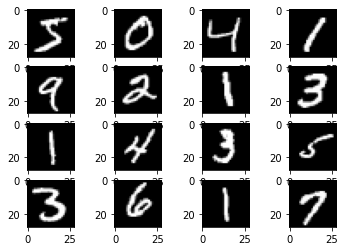

In [11]:
#Visualizing the first 16 xTrain digits in a 4 by 4 grid.
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.imshow(xTrain[i-1], cmap=plt.get_cmap('gray'))

In [15]:
#This of course reflects our yTrain labels on our 28x28 matrix of xTrain
yTrain[0:16]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7])

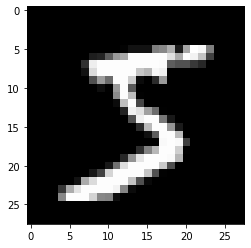

In [12]:
#If we want to inspect a specific image at index k:
digit = xTrain[0]
plt.imshow(digit, cmap=plt.get_cmap('gray'))

In [14]:
#It's value will relate with the same index : YEUP it's a five!
yTrain[0]

5

In [ ]:
trainLabelDict = Counter(trainY)
trainLabelDict

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

<BarContainer object of 10 artists>

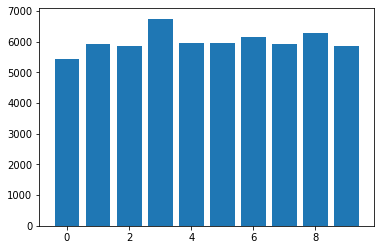

In [ ]:
#Just to show that it seems the digits are roughly uniformly distributed
plt.bar(range(len(trainLabelDict)), list(trainLabelDict.values()), align='center')

### Preprocess the test digits to be in the form of int32 (rather than uint8)





In [27]:
#You may,depending on IDE, have to set your view to see better results
np.set_printoptions(edgeitems=1, linewidth=500, 
    formatter=dict(float=lambda x: "%.3g" % x))

In [28]:
xTest[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

## K-NN Application

In [17]:
#Euclidean distance method between images p and q

def euclidean_distance(p, q):
    """
    INPUT: Matrix images p,q
    OUTPUT: Euclidian distance sum ((p-q)**2)
    Note: Be wary of uint8-uint8 due to overflow at negative.
    """
    # element-wise computations are automatically handled by numpy
    return ( np.sqrt(np.sum((p-q)**2)) )


In [18]:
#Majority K Voting

def findMajority(labels):
    """
    INPUT: list of k labels most similar to that particular image p.
    OUTPUT: The value of the greatest count.
    Dependancy: Requires Counter from collections.
    Note: If there is a tie, it takes the first max value along the dictionary.
    Method Usage: Method for Majority K Voting.
    """
    #Counter to create dictionary and count
    labelDict = Counter(labels)
    
    #Max of the dictionary
    labelMax = max(labelDict.values())
    
    #Iterate through to find key (and majority class)
    for key, value in labelDict.items():
        if value == labelMax:
            return key

In [21]:
#Predict for a single digit of k nearest neighbors

def predictOneDigit(k, trainSet, trainLabels, testDigit):
    """
    INPUT: k nearest neighbors, training set, training labels, test set.
    OUTPUT: Returns a classification based on euclidean distance for a test digit.
    Dependencies: Counter (in majority vote)
    """
    
    #For a single testDigit, compute its euclidean distance versus entire train set
    distances = [euclidean_distance(testDigit,trainSet[i]) for i in range(len(trainSet))]
    
    #Tuple distances array with labels
    tupledDistances = np.array(list(zip(trainLabels,distances)))
    
    #Sort the (this is more expensive than needed)
    sortedDistances = sorted(tupledDistances, key=lambda tup: tup[1])
    
    #Extract out k labels
    kLabels = [label for (label,_) in sortedDistances[:k]]
    
    #Return the classified label by maority vote (size k)
    return (findMajority(kLabels))
    

In [57]:
euclidean_distance(xTest[0],xTrain[15])

2002.4150418931636

In [60]:
predictOneDigit(10,xTrain,yTrain,xTest[0])

7.0

In [61]:
#Correct
yTest[0]

7

We can loop this for the entire dataset if we wish; let's consider the first 50

In [25]:
predictions1 = [predictOneDigit(10,xTrain,yTrain,xTest[i]) for i in range(50)]
predictions1 = np.array(predictions1)

In [29]:
predictions1

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 1, 3, 5, 1, 2, 4, 4])

In [30]:
yTest[0:50]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4])

In [32]:
boolArr = yTest[0:50] == predictions1
boolArr

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False,  True,  True,  True,  True,  True,  True])

In [33]:
def countBool(lst): 
    return sum(bool(x) for x in lst)

In [34]:
accuracy = countBool(boolArr)/ len(boolArr)
accuracy

0.98

K-Flod Cross Validation manually carried out with K-NN

In [36]:
#k folds for first half of data (just to save time; I just wanted to demonstrate technique of )
addition = 6000
start = 0
end = addition
kFolds = 5

errors = np.zeros(kFolds)

for k in range(kFolds):
    
    #deleting out other portion
    trainingX = np.delete(xTrain, range(start,end),axis=0)
    trainingY = np.delete(yTrain, range(start,end),axis=0)
    
    #keeping validation portion
    validationX = xTrain[start:end]
    validationY = yTrain[start:end]
    #predictions for each fold
    predictions = [predictOneDigit(1,trainingX,trainingY,validationX[i]) for i in range(len(validationX))]
    predictions = np.array(predictions)
    
    #Testing accuracy
    boolArr = validationY == predictions
    accuracy = countBool(boolArr)/ len(boolArr)
    
    #iterating fold
    print(start,end)
    start = start + addition
    end = end + addition
    
    print("Accuracy Score for %d : %.4f"%(k, accuracy) )
    errors[k] = accuracy
    
print(errors)

KeyboardInterrupt: ignored

In [ ]:
#Hyperparamaterization based on first 2000 test results for each k from 1 to 9
for k in range(1,10):
    #Performing KNN for K
    predictions1 = [predictOneDigit(k,trainX,trainY,testXArr[i]) for i in range(1000)]
    predictions1 = np.array(predictions1)
    
    boolArr = testYArr[0:1000] == predictions1
    
    accuracy = countBool(boolArr)/ len(boolArr)
    
    print("Accuracy for %d : %.4f"%(k, accuracy) )

Accuracy for 1 : 0.9620
Accuracy for 2 : 0.9620
Accuracy for 3 : 0.9650
Accuracy for 4 : 0.9640
Accuracy for 5 : 0.9630
Accuracy for 6 : 0.9640
Accuracy for 7 : 0.9630
Accuracy for 8 : 0.9620
Accuracy for 9 : 0.9540


Here I attempted a quicker solution by not sorting the entire euclidean distance set. However, this method was only slightly faster, yet in some cases reduced accuracy. If I have more time, I may return to this implementation.

In [ ]:

def predictOneDigitQuick(k, trainSet, trainLabels, testDigit):
    """
    INPUT: k nearest neighbors, training set, training labels, test set.
    OUTPUT: Returns a classification based on euclidean distance for a test digit.
    Dependencies: Counter (in majority vote)
    """
    
    #For a single testDigit, compute its euclidean distance versus entire train set
    distances = [euclidean_distance(testDigit,trainSet[i]) for i in range(len(trainX))]
    
    #Tuple distances array with labels
    tupledDistances = np.array(list(zip(trainLabels,distances)))
    
    #Sort the (this is more expensive than needed)
    #sortedDistances = sorted(tupledDistances, key=lambda tup: tup[1])
    
    sortedDistances = smallestKInTuple(tupledDistances,k)
    
    #Extract out k labels
    kLabels = [label for (label,_) in sortedDistances[:k]]
    
    #Return the classified label by maority vote (size k)
    return (findMajority(kLabels))



In [ ]:
#I attempt my version with only finding minimum k
import time
start_time = time.time()

#predictions = np.zeros(len(testYArr))
predictions1 = np.zeros(100)
for i in range(100):
    predictions1[i] = predictOneDigitQuick(10,trainX,trainY,testXArr[i])
    if(i % 10 == 0):
        print("locally at:",i)

print("--- %s seconds ---" % (time.time() - start_time))


locally at: 0
locally at: 10
locally at: 20
locally at: 30
locally at: 40
locally at: 50
locally at: 60
locally at: 70
locally at: 80
locally at: 90
--- 64.744877576828 seconds ---


In [ ]:
#Instead of list comprehension, I use an explicit for loop to show progress/user feedback as classification takes place
predictions = np.zeros(len(testYArr))
for i in range(len(testYArr)):
    predictions[i] = predictOneDigit(10,trainX,trainY,testXArr[i])
    if(i % 10 == 0):
        print("locally at:",i)

locally at: 0
locally at: 10
locally at: 20
locally at: 30
locally at: 40
locally at: 50
locally at: 60
locally at: 70
locally at: 80
locally at: 90
locally at: 100
locally at: 110
locally at: 120
locally at: 130
locally at: 140
locally at: 150
locally at: 160
locally at: 170
locally at: 180
locally at: 190
locally at: 200
locally at: 210
locally at: 220
locally at: 230
locally at: 240
locally at: 250
locally at: 260
locally at: 270
locally at: 280
locally at: 290
locally at: 300
locally at: 310
locally at: 320
locally at: 330
locally at: 340
locally at: 350
locally at: 360
locally at: 370
locally at: 380
locally at: 390
locally at: 400
locally at: 410
locally at: 420
locally at: 430
locally at: 440
locally at: 450
locally at: 460
locally at: 470
locally at: 480
locally at: 490
locally at: 500
locally at: 510
locally at: 520
locally at: 530
locally at: 540
locally at: 550
locally at: 560
locally at: 570
locally at: 580
locally at: 590
locally at: 600
locally at: 610
locally at: 620
loc

In [ ]:
predictions

array([7, ..., 6])

In [ ]:
predictions

[7.0, 2.0, 1.0, 0.0, 4.0, 1.0, 4.0, 9.0, 5.0, 9.0]

In [ ]:
correct = yTest
correct

array([7, ..., 6])

If we wish to save our results

In [ ]:
import scipy.io

#predictions
#correct
scipy.io.savemat('test.mat', dict(predictions=predictions, correct=correct))

### Considering data type for Euclidean Distance

Note that labelling in this section is from an old version; names may need to be changed.

The essential idea is that you cannot perform appropriate euclidean distance calculations with uint8 (and thus need to convert to another dtype).

In [ ]:
#Setting view
np.set_printoptions(edgeitems=1, linewidth=500, 
    formatter=dict(float=lambda x: "%.3g" % x))

In [ ]:
trainX[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 227, 253, 252, 239, 233, 252

In [ ]:
testX[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 150, 253, 202,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 251, 251, 253, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 197, 251, 251, 253, 107,   0,   0,   0

In [ ]:
testX[3]-trainX[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 150, 253, 151, 128,   3,  97, 206,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 251, 203,  15, 111,   4,   4,  19,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 197, 197,  24,   0, 111,  17,  23,   4

This is not a valid form of euclidean distance. 

This is because uint8 ranges from 0-256. As such, we cannot acquire negative values. Overflow leaves values of 199, which are overestimations of error at a location.

In [ ]:
#Observe:
testX[3][6][20]-trainX[1][6][20]

/home/marco/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


199

In [ ]:
#Convert test to int32
TestXNew = testX[3].astype(np.int32)
TestXNew

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 150, 253, 202,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 251, 251, 253, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 197, 251, 251, 253, 107,   0,   0,   0

In [ ]:
TestXNew - trainX[1]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   11,  150,  253,  151, -128, -253, -159,  -50,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   37,  251,  203,   15, -145, -252,

In [ ]:
#Further verification if Euclidean norm versus my manual calculation
from numpy import linalg as LA
heyo = TestXNew - trainX[1]
LA.norm(heyo,'fro')

1980.683972773042

In [ ]:
TestXNew = testX[3].astype(np.int32)

In [ ]:
#Seems legit.
np.sqrt(np.sum((trainX[1]-TestXNew)**2))

1980.683972773042

## Bottom K By Intuition
Even if our solution is not perfectly efficient, it should save time by reducing the complexity from sorting an ENTIRE array N times to K-Smallest N times.

Yet our code methodology has an imprecision because of a small drop in accuracy. These indices can be seen when a boolean comparison is made bwteen this method and the standard tuple sort method

It should also be considered that perhaps sorting tuples is not the way to go to reduce computational complexity.

In [ ]:
tupledVals = [(0,1.2),(0,0.8),(1,2.2),(2,3.2),(0,0.2),(4,72),(6,2.1),(9,10)]

In [ ]:

def smallestKInTuple(inputList,k):
    """
    INPUT: An array or list of TUPLES
    OUTPUT: smallest k elements
    Functionality: Does so by modified selection sort.
    Dependancy: I use numpy for argmin.
    """
    #Store into temp array
    temp = inputList[0:k]
    
    #Find max of temp array
    maxTemp = max(temp, key = lambda t: t[1])
    maxVal = maxTemp[1]
    
    #for inputLIst[k:]
    for i in range(k,len(inputList)):
        #if the value at i in inputList[k:n] is less
        if(inputList[i][1] < maxVal):
            #Swap that value with current max in our k list
            
            #This is to determine the index where we have our max location
            p = -1
            for tupleTemp in temp:
                p = p+1
                
                if(tupleTemp[1] == maxVal):
                    maxLocation = p
            
            
            temp[maxLocation] = inputList[i]
            
            #New max
            maxTemp = max(temp, key = lambda t: t[1])
            maxVal = maxTemp[1]
            
    return temp


In [ ]:
smallestKInTuple(tupledVals,3)

[(0, 1.2), (0, 0.8), (0, 0.2)]